<a href="https://colab.research.google.com/github/Sreelakshmiml/Scifor/blob/main/no_plate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Number plate recognition using EasyOCR and OpenCv**

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
#reading image
img = cv2.imread("/content/car_no.jpg")

In [ ]:
#converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

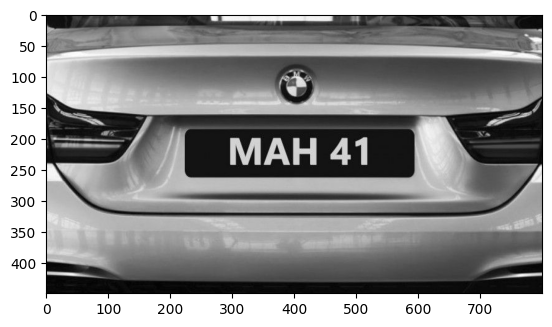

In [ ]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

Apply filter and find edges for localization

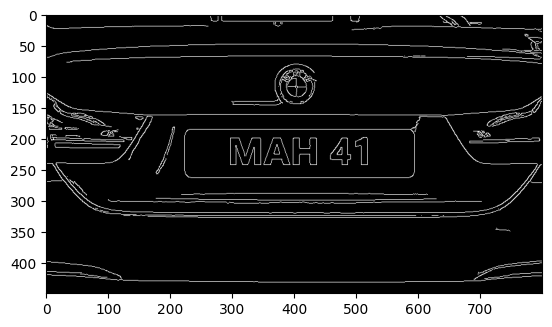

In [ ]:
#noise reduction
bfilter= cv2.bilateralFilter(gray,11,17,17)

#edge detection
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

find contours and apply mask

In [ ]:
#finding contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
#storing the coordinates of detected shape
location = None
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    if len(approx) == 4:
      location = approx
      break

In [ ]:
location

array([[[594, 193]],

       [[231, 185]],

       [[223, 252]],

       [[585, 263]]], dtype=int32)

In [ ]:
type(gray)

numpy.ndarray

In [ ]:
#creating mask
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
#retain only pixels of detected shape
new_image = cv2.bitwise_and(img,img,mask = mask)

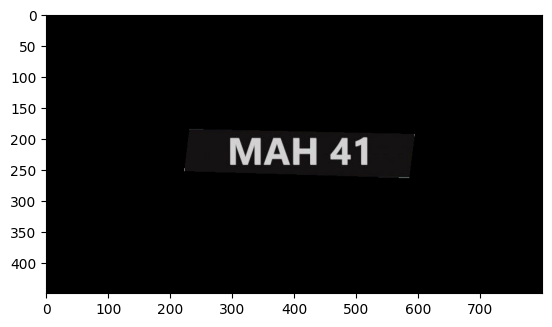

In [ ]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
#finding coordinates
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))

In [ ]:
cropped_img = gray[x1:x2+1,y1:y2+1]

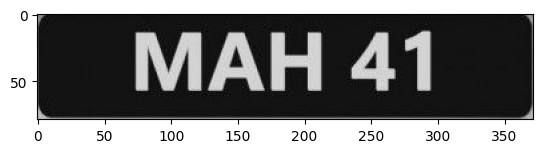

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

Use Easy OCR to read text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)

In [ ]:
result

[([[71, 7], [307, 7], [307, 67], [71, 67]], 'MAH 41', 0.8098626455059279)]

In [ ]:
type(result)

list

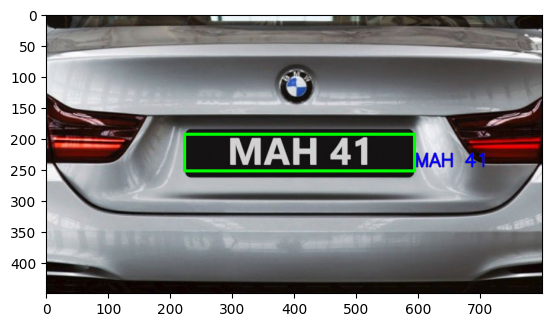

In [ ]:
#annotating orginal image with detected text
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org=(approx[0][0][0], approx[1][0][1]+60),fontFace=font,fontScale=1,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))